In [1]:
# Import essential libraries
import pandas as pd   # for handling data
import numpy as np    # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for better visualizations


In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

# Check the info about columns and missing data
df.info()





Dataset shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

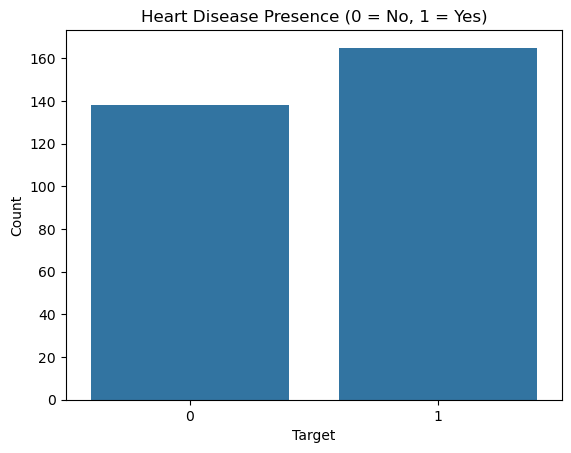

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence (0 = No, 1 = Yes)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


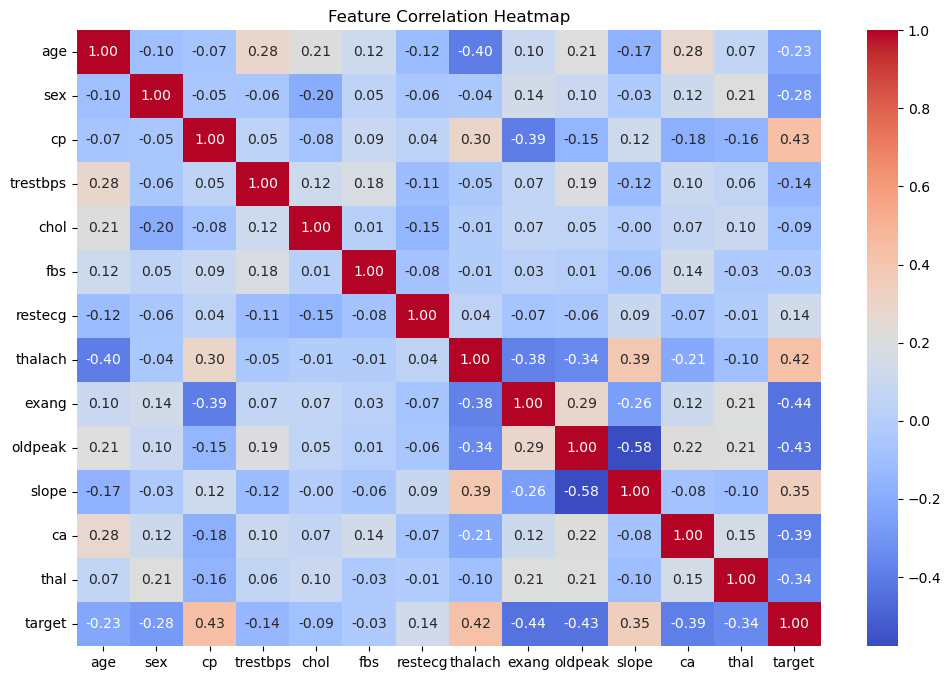

In [7]:
#Correlation Heatmap (to see which features relate to target)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


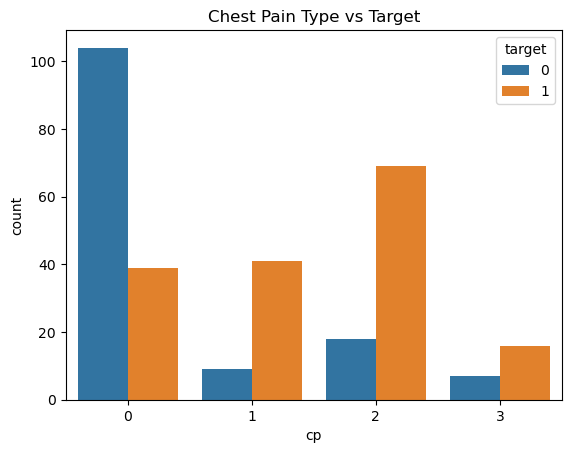

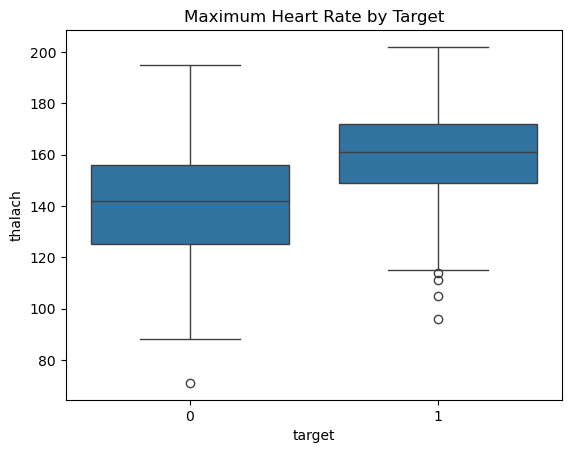

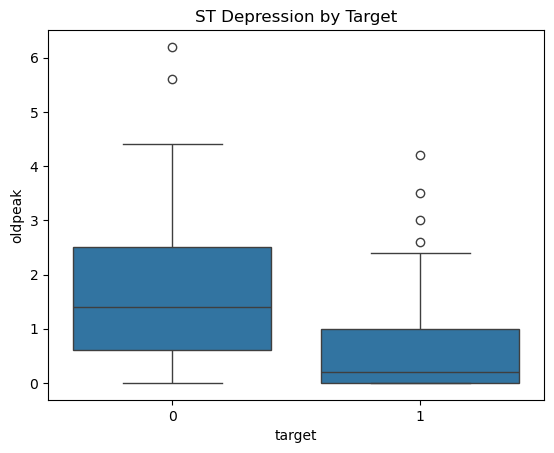

In [8]:
#Chest Pain Type (cp)
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Target')
plt.show()


#Maximum Heart Rate (thalach)
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate by Target')
plt.show()


#ST Depression (oldpeak)
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression by Target')
plt.show()



In [9]:
'''
Split the Data into Training and Testing Sets
Training Set (e.g., 80%) – used to train the machine learning model.
Testing Set (e.g., 20%) – used to evaluate how well the model performs on unseen data.
'''
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df.drop('target', axis=1)  # all columns except 'target'
y = df['target']               # the column we want to predict

# Step 2: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Optional: Check the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (242, 13)
X_test: (61, 13)
y_train: (242,)
y_test: (61,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)



# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
[[24  5]
 [ 5 27]]


In [ ]:
# Rebuild importance_df from your trained Random Forest model
import pandas as pd

# Assuming rf_model is your trained Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})


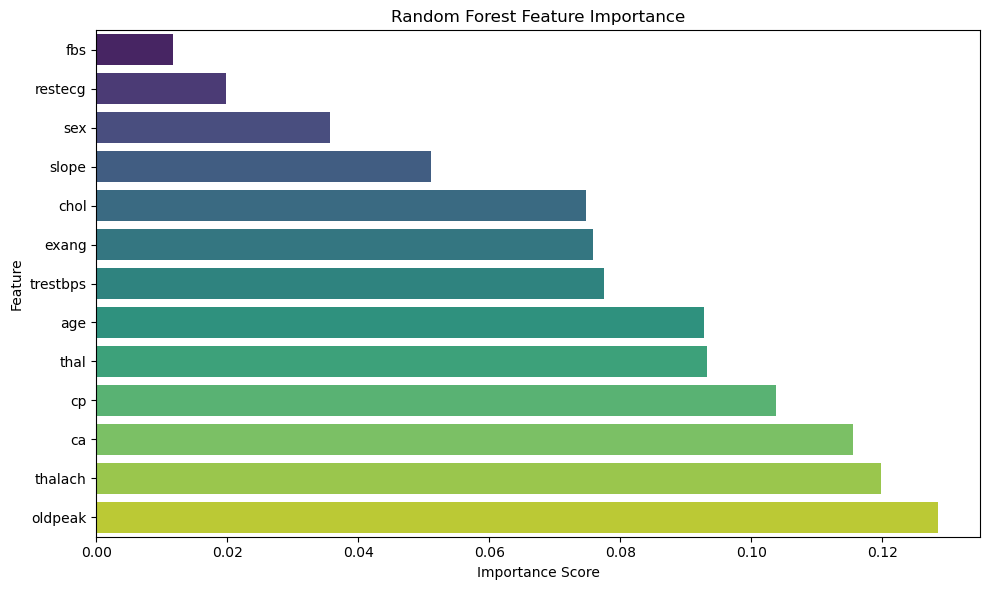

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort for prettier horizontal bars
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    hue='Feature',         # Avoids future seaborn warning
    palette='viridis',
    legend=False
)

plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [13]:
# If not done yet, define X and y
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [14]:
# Recalculate feature importances from the trained model
import pandas as pd

importances = rf_model.feature_importances_
features = X.columns

# Create importance_df
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 8 important features
top_features = list(importance_df['Feature'].head(8))

# Create reduced datasets using top 8 features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]
print(X_test_reduced.shape)


(61, 8)


In [15]:
# Train a new Random Forest model with reduced features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_pred = rf_reduced.predict(X_test_reduced)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8360655737704918

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
 [[24  5]
 [ 5 27]]


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

print("🔁 Starting hyperparameter tuning...")

param_grid = {
    'n_estimators': [100, 150, 200 ],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("🚀 Now training with grid search (this may take a while)...")

grid_search.fit(X_train_reduced, y_train)

print("✅ Best Parameters:", grid_search.best_params_)


🔁 Starting hyperparameter tuning...
🚀 Now training with grid search (this may take a while)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
best_model = grid_search.best_estimator_
print(best_model)




RandomForestClassifier(max_depth=5, random_state=42)


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the best model
y_pred_best = best_model.predict(X_test_reduced)

# Show final results
print("✅ Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


✅ Tuned Model Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
 [[25  4]
 [ 5 27]]


In [26]:
import joblib
joblib.dump(best_model, 'cardio_model.pkl')


['cardio_model.pkl']

In [27]:
print(top_features)


['oldpeak', 'thalach', 'ca', 'cp', 'thal', 'age', 'trestbps', 'exang']
